In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plot
import statsmodels.api as sm
import seaborn as sns
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'Housing.csv')
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
data.shape

(545, 13)

In [6]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

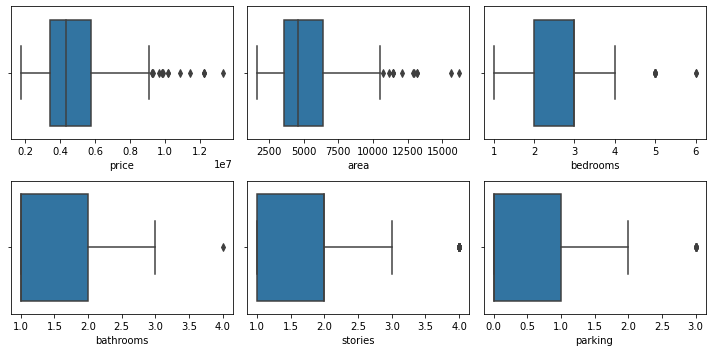

In [7]:
def detectOutliers():
    fig, axs = plot.subplots(2,3, figsize = (10,5))
    plt1 = sns.boxplot(data['price'], ax = axs[0,0])
    plt2 = sns.boxplot(data['area'], ax = axs[0,1])
    plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
    plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
    plt2 = sns.boxplot(data['stories'], ax = axs[1,1])
    plt3 = sns.boxplot(data['parking'], ax = axs[1,2])
    plot.tight_layout()
detectOutliers()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
1,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
2,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
3,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
4,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished


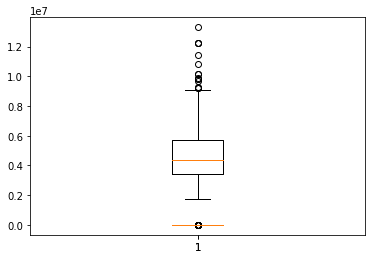

In [8]:
# Outlier reduction for price
plot.boxplot(data.price)
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]
# Outlier reduction for area
plot.boxplot(data.area)
Q1 = data.area.quantile(0.25)
Q3 = data.area.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.area >= Q1 - 1.5*IQR) & (data.area <= Q3 + 1.5*IQR)]
data= data.reset_index(drop=True)
display(data.head())

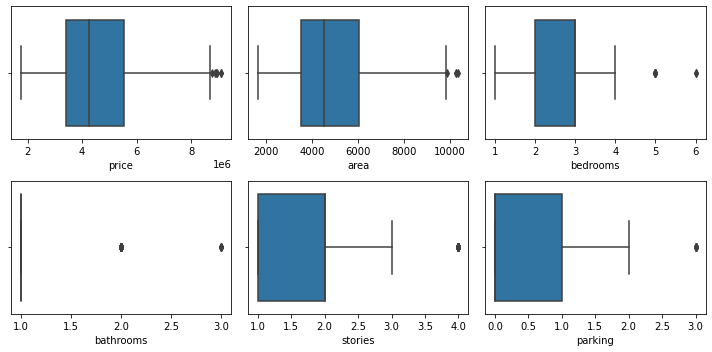

In [9]:
detectOutliers()

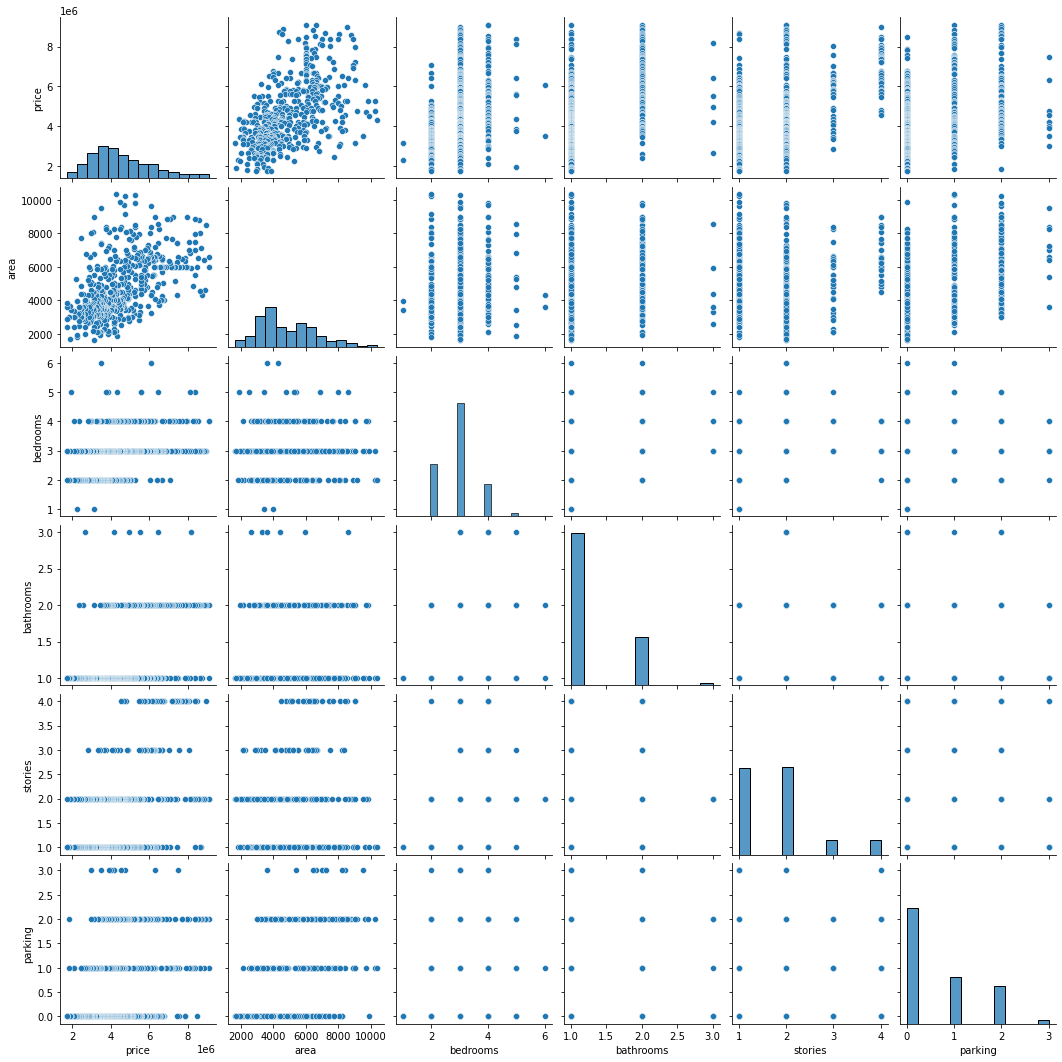

In [10]:
sns.pairplot(data)
plot.show()

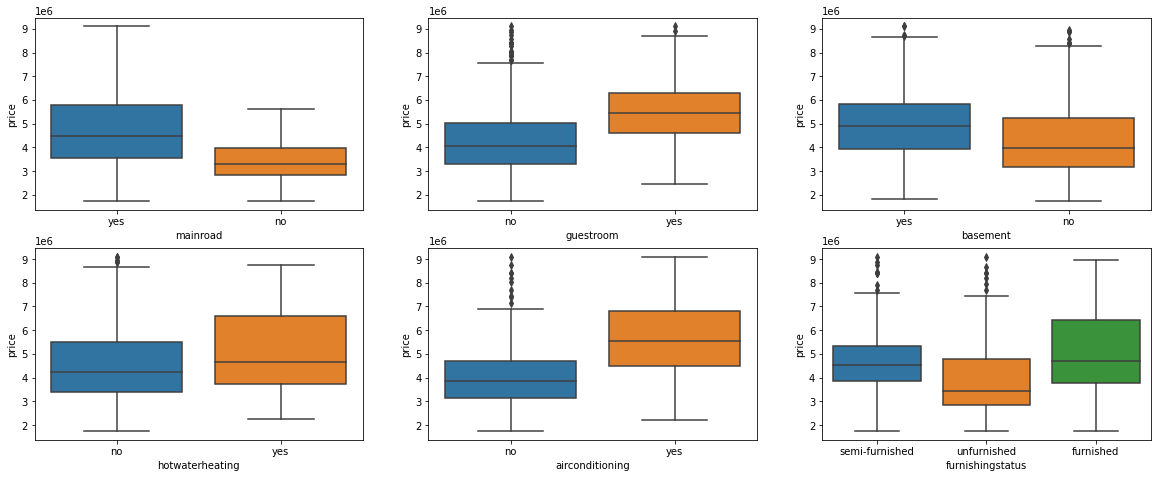

In [11]:
plot.figure(figsize=(20, 12))
plot.subplot(3,3,1)
sns.boxplot(x='mainroad', y='price', data=data)
plot.subplot(3,3,2)
sns.boxplot(x='guestroom', y='price', data=data)
plot.subplot(3,3,3)
sns.boxplot(x='basement', y='price', data=data)
plot.subplot(3,3,4)
sns.boxplot(x='hotwaterheating', y='price', data=data)
plot.subplot(3,3,5)
sns.boxplot(x='airconditioning', y='price', data=data)
plot.subplot(3,3,6)
sns.boxplot(x='furnishingstatus', y='price', data=data)
plot.show()

In [12]:
def toNumeric(x):
    return x.map({"no":0,"yes":1})
def convert_binary():     
    for column in list(data.select_dtypes(['object']).columns):
        if(column != 'furnishingstatus'):
            data[[column]] = data[[column]].apply(toNumeric)
convert_binary()

In [13]:
status = pd.get_dummies(data['furnishingstatus'])
status

,furnished,semi-furnished,unfurnished
0,0,1,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
512,0,0,1
513,0,1,0
514,0,0,1
515,1,0,0


In [14]:
status = pd.get_dummies(data['furnishingstatus'], drop_first=True)

In [15]:
data = pd.concat([data, status], axis=1)

In [16]:
data.drop(columns='furnishingstatus',inplace=True)

In [17]:
Y = data.price
# includes the fields other than prices
X = data.iloc[:,1:]

In [18]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.05,random_state=355)

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]

# specify model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
rfe = RFE(linear_model)             

# call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X, Y)     

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [19]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009175,1.933856e-03,0.000991,1.313719e-05,1,{'n_features_to_select': 1},0.271014,0.055363,0.200331,0.188173,...,0.168953,0.072387,13,0.200283,0.261989,0.220852,0.230326,0.235266,0.229743,0.020088
1,0.006981,1.168008e-07,0.000997,2.431402e-07,2,{'n_features_to_select': 2},0.496025,0.293120,0.388173,0.332404,...,0.361646,0.075231,12,0.336502,0.392459,0.370064,0.383906,0.389608,0.374508,0.020507
2,0.006782,1.595426e-03,0.001197,3.989697e-04,3,{'n_features_to_select': 3},0.577507,0.380712,0.390286,0.420010,...,0.426998,0.077272,10,0.398130,0.454179,0.451213,0.445240,0.456106,0.440974,0.021735
3,0.006582,1.196861e-03,0.001396,4.886945e-04,4,{'n_features_to_select': 4},0.572090,0.374009,0.363645,0.406798,...,0.415536,0.079952,11,0.414651,0.492213,0.471393,0.462476,0.471254,0.462397,0.025800
4,0.008389,8.059192e-04,0.001995,6.106495e-07,5,{'n_features_to_select': 5},0.541882,0.396254,0.417815,0.429156,...,0.430276,0.059777,9,0.469817,0.521004,0.504569,0.493750,0.506020,0.499032,0.016992
5,0.006580,1.354179e-03,0.001392,4.915410e-04,6,{'n_features_to_select': 6},0.565870,0.436488,0.438725,0.466743,...,0.465714,0.052225,8,0.493452,0.567133,0.524935,0.519646,0.528419,0.526717,0.023648
6,0.004406,4.739596e-04,0.001002,8.202985e-06,7,{'n_features_to_select': 7},0.587864,0.461186,0.456794,0.475467,...,0.483442,0.053727,7,0.537598,0.606710,0.546256,0.542468,0.550458,0.556698,0.025363
7,0.003989,2.338088e-05,0.001191,4.024829e-04,8,{'n_features_to_select': 8},0.640155,0.493474,0.486433,0.573914,...,0.533524,0.063888,6,0.546026,0.617453,0.589814,0.570049,0.593216,0.583312,0.023967
8,0.004001,1.105757e-03,0.001406,4.893651e-04,9,{'n_features_to_select': 9},0.665886,0.494916,0.521541,0.595499,...,0.563036,0.061081,5,0.576568,0.623873,0.618297,0.601307,0.614403,0.606889,0.016885
9,0.003192,3.983286e-04,0.001198,4.007818e-04,10,{'n_features_to_select': 10},0.672569,0.494702,0.529628,0.601300,...,0.568621,0.062322,2,0.581715,0.626541,0.622747,0.606660,0.619457,0.611424,0.016289


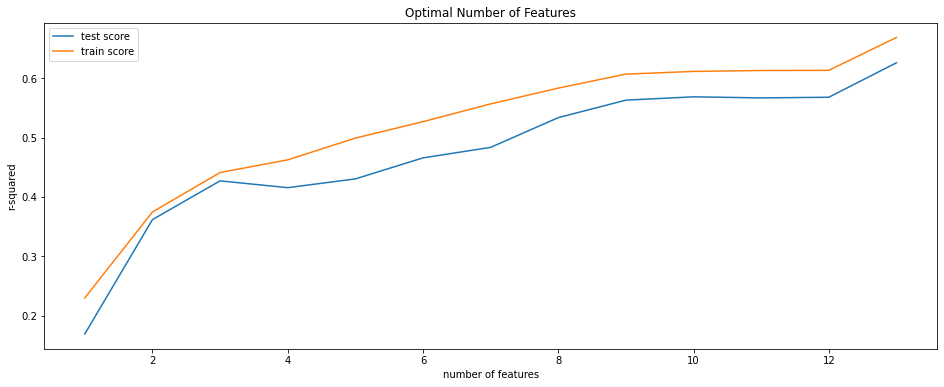

In [20]:
# plotting cv results
plot.figure(figsize=(16,6))

plot.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plot.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plot.xlabel('number of features')
plot.ylabel('r-squared')
plot.title("Optimal Number of Features")
plot.legend(['test score', 'train score'], loc='upper left')

In [21]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
def preprocessing(X):    
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    variables = X_scaled
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
    vif["Features"] = X.columns
    print(vif)

In [22]:
preprocessing(X)

         VIF         Features
0   5.695074             area
1   7.370649         bedrooms
2   1.640001        bathrooms
3   2.702247          stories
4   5.841277         mainroad
5   1.521360        guestroom
6   1.998402         basement
7   1.077140  hotwaterheating
8   1.745831  airconditioning
9   1.912748          parking
10  1.444422         prefarea
11  2.306936   semi-furnished
12  1.941835      unfurnished


In [23]:
X.drop(['mainroad','bedrooms'], axis=1, inplace=True)
preprocessing(X)

         VIF         Features
0   4.272647             area
1   1.572188        bathrooms
2   2.134350          stories
3   1.518522        guestroom
4   1.832215         basement
5   1.074235  hotwaterheating
6   1.745076  airconditioning
7   1.873550          parking
8   1.422639         prefarea
9   1.859642   semi-furnished
10  1.545732      unfurnished


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.05,random_state=355)

In [25]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [26]:
y_predict = regression.predict(x_test)
y_prediction = y_predict.round(2)

In [27]:
comparison = pd.DataFrame(list(zip(y_train,y_prediction)), columns = ['Actual','Predicted'])
comparison

,Actual,Predicted
0,2450000,4110923.85
1,7700000,4589204.76
2,6020000,3263701.53
3,4193000,3018647.94
4,7245000,3016972.75
5,4795000,3136970.16
6,2520000,3261917.84
7,6720000,3865200.59
8,2380000,3393506.52
9,5033000,2854157.26


In [28]:
#overall maximum score of actual and predicted value
myMax = max(max(y_test), max(y_prediction))
myMax

7560000

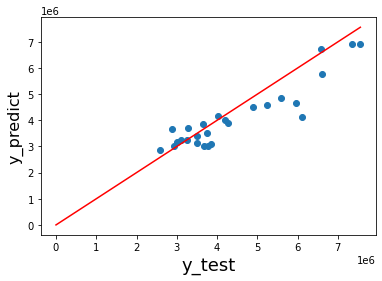

In [29]:
plot.scatter(y_test,y_prediction)          
plot.xlabel('y_test', fontsize=18)                        
plot.ylabel('y_predict', fontsize=16)
plot.plot([0,myMax],[0,myMax],'r')
plot.show()

(array([1., 2., 7., 3., 4., 7., 0., 1., 0., 1.]),
 array([-804916.15, -524766.92, -244617.69,   35531.54,  315680.77,
         595830.  ,  875979.23, 1156128.46, 1436277.69, 1716426.92,
        1996576.15]),
 <BarContainer object of 10 artists>)

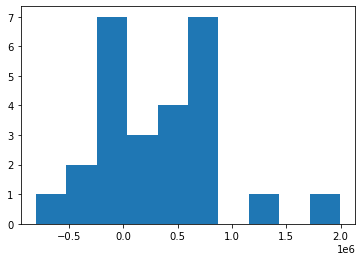

In [30]:
plot.hist(y_test - y_prediction)

In [31]:
import statsmodels.api as sms
model_1 = sms.OLS(y_train, x_train).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              1068.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):                        0.00
Time:                        17:40:46   Log-Likelihood:                         -7460.3
No. Observations:                 491   AIC:                                  1.494e+04
Df Residuals:                     480   BIC:                                  1.499e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
area              327.4369     23.917     13.691      0.000     280.442     374.431
bathrooms        9.352e+05   9.27e+04     10.087      0.000    7.53e+05    1.12e+06
stories          5.597e+05   5.42e+04     10.323      0.000    4.53e+05    6.66e+05
guestroom        2.902e+05   1.26e+05      2.309      0.021    4.32e+04    5.37e+05
basement         4.487e+05   1.02e+05      4.399      0.000    2.48e+05    6.49e+05
hotwaterheating  7.254e+05   2.15e+05      3.367      0.001    3.02e+05    1.15e+06
airconditioning  7.535e+05   1.04e+05      7.237      0.000    5.49e+05    9.58e+05
parking          2.104e+05   5.62e+04      3.742      0.000    9.99e+04    3.21e+05
prefarea         5.286e+05   1.11e+05      4.741      0.000     3.1e+05    7.48e+05
semi-furnished   1.667e+05   1.03e+05      1.618      0.106   -3.57e+04    3.69e+05
unfurnished     -1.741e+05   1.05e+05     -1.666      0.096    -3.8e+05    3.12e+04
==============================================================================
Omnibus:                       27.659   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.957
Skew:                           0.374   Prob(JB):                     2.34e-11
Kurtosis:                       4.354   Cond. No.                     2.59e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
MAE = metrics.mean_absolute_error(y_test,y_prediction)
MAE

490892.63961538457

In [33]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_prediction)
print(mse)

424521475148.489


In [34]:
np.sqrt(metrics.mean_squared_error(y_test, y_prediction))

651553.1253462675

In [35]:
from sklearn.model_selection import cross_val_score
from numpy import mean

cv = KFold(n_splits=6, random_state=355, shuffle=True) 

cross_val_r2_scores = cross_val_score(regression, x_train, y_train, scoring='r2', cv=cv)
mean(cross_val_r2_scores)    

0.630490616202016

In [36]:
from sklearn import metrics
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.7954299575715643